# import required library

In [1]:
import rasterio, rasterio.features, rasterio.warp  # library for handling Tiff file (raster file)
from pathlib import Path              # import Path library for handling paths in Object Oriented Fashion
from matplotlib import pyplot as plt  # Python Visualization library
import pandas as pd  # python library for handling tabular data
import numpy as np   # python library for 
import json # json library 
import joblib

#### create a template dictionary used later for creating pandas' dataframe

In [2]:
#template_dict_complete = \
#{'name':[], 'ndvi_a':[], 'ndvi_b':[], 'ndvi_c':[], 'ndvi_d':[], 'slope':[], 'aspect':[], 'elev':[], 'b2_a':[], 'b3_a':[], 'b4_a':[], 'b5_a':[], 'b6_a':[], 'b7_a':[], 'b8_a':[], 'b8a_a':[], 'b2_b':[], 'b3_b':[], 'b4_b':[], 'b5_b':[], 'b6_b':[], 'b7_b':[], 'b8_b':[], 'b8a_b':[], 'b2_c':[], 'b3_c':[], 'b4_c':[], 'b5_c':[], 'b6_c':[], 'b7_c':[], 'b8_c':[], 'b8a_c':[], 'b2_d':[], 'b3_d':[], 'b4_d':[], 'b5_d':[], 'b6_d':[], 'b7_d':[], 'b8_d':[], 'b8a_d':[], 'der_b2_a':[], 'der_b3_a':[], 'der_b4_a':[], 'der_b5_a':[], 'der_b6_a':[], 'der_b7_a':[], 'der_b8_a':[], 'der_b8a_a':[], 'der_b2_b':[], 'der_b3_b':[], 'der_b4_b':[], 'der_b5_b':[], 'der_b6_b':[], 'der_b7_b':[], 'der_b8_b':[], 'der_b8a_b':[], 'der_b2_c':[], 'der_b3_c':[], 'der_b4_c':[], 'der_b5_c':[], 'der_b6_c':[], 'der_b7_c':[], 'der_b8_c':[], 'der_b8a_c':[], 'der_b2_d':[], 'der_b3_d':[], 'der_b4_d':[], 'der_b5_d':[], 'der_b6_d':[], 'der_b7_d':[], 'der_b8_d':[], 'der_b8a_d':[],'mea_b2_a':[], 'mea_b3_a':[], 'mea_b4_a':[], 'mea_b5_a':[], 'mea_b6_a':[], 'mea_b7_a':[], 'mea_b8_a':[], 'mea_b8a_a':[], 'mea_b2_b':[], 'mea_b3_b':[], 'mea_b4_b':[], 'mea_b5_b':[], 'mea_b6_b':[], 'mea_b7_b':[], 'mea_b8_b':[], 'mea_b8a_b':[], 'mea_b2_c':[], 'mea_b3_c':[], 'mea_b4_c':[], 'mea_b5_c':[], 'mea_b6_c':[], 'mea_b7_c':[], 'mea_b8_c':[], 'mea_b8a_c':[], 'mea_b2_d':[], 'mea_b3_d':[], 'mea_b4_d':[], 'mea_b5_d':[], 'mea_b6_d':[], 'mea_b7_d':[], 'mea_b8_d':[], 'mea_b8a_d':[], 'var_b2_a':[], 'var_b3_a':[], 'var_b4_a':[], 'var_b5_a':[], 'var_b6_a':[], 'var_b7_a':[], 'var_b8_a':[], 'var_b8a_a':[], 'var_b2_b':[], 'var_b3_b':[], 'var_b4_b':[], 'var_b5_b':[], 'var_b6_b':[], 'var_b7_b':[], 'var_b8_b':[], 'var_b8a_b':[], 'var_b2_c':[], 'var_b3_c':[], 'var_b4_c':[], 'var_b5_c':[], 'var_b6_c':[], 'var_b7_c':[], 'var_b8_c':[], 'var_b8a_c':[], 'var_b2_d':[], 'var_b3_d':[], 'var_b4_d':[], 'var_b5_d':[], 'var_b6_d':[], 'var_b7_d':[], 'var_b8_d':[], 'var_b8a_d':[], 'label':[]}
# template dictionary used as input of pandas data frame to build dataset and use for ML model

In [3]:
template_dict = \
{'name':[], 'ndvi_a':[], 'ndvi_b':[], 'ndvi_c':[], 'slope':[], 'aspect':[], 'elev':[], 'b2_a':[], 'b3_a':[], 'b4_a':[], 'b5_a':[], 'b6_a':[], 'b7_a':[], 'b8_a':[], 'b8a_a':[], 'b2_b':[], 'b3_b':[], 'b4_b':[], 'b5_b':[], 'b6_b':[], 'b7_b':[], 'b8_b':[], 'b8a_b':[], 'b2_c':[], 'b3_c':[], 'b4_c':[], 'b5_c':[], 'b6_c':[], 'b7_c':[], 'b8_c':[], 'b8a_c':[], 'label':[]}

#### define project main path, json of DEM path. Also define dates and bands dictionary for convenient

In [4]:
project_folder = Path.cwd()/'main'
json_path = Path.cwd()/'json.json'
dates_complete = {'a':'20191005','b':'20191104', 'c':'20191214','d':'20200106','e':'20200126','f':'20200311','g':'20200405','h':'20200530','i':'20200704','j':'20200729','k':'20200902'}
dates = {'a':'20200311','b':'20200729', 'c':'20200902'}
bands = {'b2':'B02_10m.tif', 'b3':'B03_10m.tif', 'b4':'B04_10m.tif', 'b5':'B05_10m.tif', 'b6':'B06_10m.tif', 'b7':'B07_10m.tif', 'b8':'B08_10m.tif', 'b8a':'B8a_10m.tif'}


#### Path of each crop (Tea, forest, paddy, built-ups) folder (rasters)

In [5]:
tea_path = project_folder/'rasters'/'TEA'
forest_path = project_folder/'rasters'/'FOR'
build_up_path = project_folder/'rasters'/'BU'
paddy_path = project_folder/'rasters'/'PF'

#### Store path of folders for each land ,the output is like:> tea-lands = {'date':[path to folders of teas of specified date]}

In [6]:
tea_land = {date:sorted([fol/date for fol in tea_path.iterdir() if fol.is_dir()]) for date in dates.values()}
for_land = {date:sorted([fol/date for fol in forest_path.iterdir() if fol.is_dir()]) for date in dates.values()}
bul_land = {date:sorted([fol/date for fol in build_up_path.iterdir() if fol.is_dir()]) for date in dates.values()}
pad_land = {date:sorted([fol/date for fol in paddy_path.iterdir() if fol.is_dir()]) for date in dates.values()}

#### example: paths of paddy field lands in second date (dates['b'])

In [7]:
tea_land[dates['b']]

[PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/02/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/03/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/04/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/05/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/06/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/07/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/08/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/09/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/10/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/11/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/12/20200729'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/13/20200729'),
 PosixPath('

#### paths of lands in order of tea > forest > built-ups > paddy 

In [8]:
def all_path_in_order_for_each_date(date):
    """Return a list of paths to each lands of different crop type in this order: tea>forest>>build_up>paddy
    Need to specify a date: 'a','b','c','d' """
    res = tea_land[dates[date]]+for_land[dates[date]]+bul_land[dates[date]]+pad_land[dates[date]]
    return res

#### example: paths of all lands in order of crop and land number for date 'a'

In [9]:
all_path_in_order_for_each_date('a')

[PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/02/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/03/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/04/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/05/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/06/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/07/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/08/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/09/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/10/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/11/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/12/20200311'),
 PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/13/20200311'),
 PosixPath('

#### Calculation Functions:

In [10]:
def mask_after_query(target_image):

    mask_target_image = np.copy(target_image)
    mask_image = (target_image == -1000) | (target_image == -100) | (target_image == -101)
    mask_target_image[mask_image] = None
    return mask_target_image

In [11]:
def ndvi_scorer(path):
    """Get Path to 'Tiff' Folder and Name of date: a , b (a: spring, b: winter)
    Return mean
    """
    with rasterio.open(path/'ndvi_10m.tif', 'r') as ds:
        arr = ds.read()  # read all raster values
    target_index_file = mask_after_query(arr)
    A = np.ravel(target_index_file)
    avg = A[~np.isnan(A)].mean()
    return avg

In [12]:
def band_scorer(path,band):
    """Get Path to 'Tiff' Folder and Name of Band: b2,b3,b4,b5,b6,b7,b8,b8a
    Return mean
    """
    print(path/bands[band])
    with rasterio.open(path/bands[band], 'r') as ds:
        arr = ds.read()  # read all raster values
    target_index_file = arr
    A = np.ravel(target_index_file)
    avg = A[~np.isnan(A)].mean()
    return avg
    

#### Example: How to access to folder of first land of Tea crop in 3'rd date

In [13]:
tea_land[dates['c']][0]

PosixPath('/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902')

In [14]:
for i in tea_land[dates['c']][0].iterdir():
    print(i)

/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B07_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B05_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B04_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/ndvi_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B03_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B08_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B06_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200902/B8a_10m.tif


#### Example : How to  calculate band b4 for 6'th land of tea in date :(dates['b'])

In [15]:
band_scorer(path=tea_land[dates['b']][5],band='b4')

/home/mas/Desktop/Satplat_final/main/rasters/TEA/06/20200729/B04_10m.tif


169.65833333333333

In [16]:
ndvi_scorer(path=pad_land[dates['a']][38])

<ipython-input-11-697f9e40d726>:9: RuntimeWarning: Mean of empty slice.
  avg = A[~np.isnan(A)].mean()
/home/mas/.venvs/tea/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


nan

#### Create a Dataframe Using Name of Each Folder as 'name' Column Variable in Order

In [17]:
df = pd.DataFrame(template_dict)

In [18]:
df

,name,ndvi_a,ndvi_b,ndvi_c,slope,aspect,elev,b2_a,b3_a,b4_a,...,b8a_b,b2_c,b3_c,b4_c,b5_c,b6_c,b7_c,b8_c,b8a_c,label


#### Extract name of lands from folders name ( ! date value does not impact the result)

In [19]:
all_lands = tea_land[dates['a']]+for_land[dates['a']]+bul_land[dates['a']]+pad_land[dates['a']]

names_of_lands = [i.parts[-3]+i.parts[-2] for i in all_lands]
names_of_lands
# Fill Label Column with 1 if corresponding Name Column Contains 'tea'
df['name'] = pd.Series(names_of_lands)
df['label'] = pd.Series(np.where(df['name'].str.contains('^TEA'),1,0))
df

,name,ndvi_a,ndvi_b,ndvi_c,slope,aspect,elev,b2_a,b3_a,b4_a,...,b8a_b,b2_c,b3_c,b4_c,b5_c,b6_c,b7_c,b8_c,b8a_c,label
0,TEA01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,TEA02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,TEA03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,TEA04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,TEA05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,PF36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
244,PF37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
245,PF38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
246,PF39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


#### Fill ndvi columns

In [20]:
df['ndvi_a'] = pd.Series([ndvi_scorer(i) for i in all_path_in_order_for_each_date('a')])
df['ndvi_b'] = pd.Series([ndvi_scorer(i) for i in all_path_in_order_for_each_date('b')])
df['ndvi_c'] = pd.Series([ndvi_scorer(i) for i in all_path_in_order_for_each_date('c')])

<ipython-input-11-697f9e40d726>:9: RuntimeWarning: Mean of empty slice.
  avg = A[~np.isnan(A)].mean()
/home/mas/.venvs/tea/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


### Fill bands

In [21]:
[i for i in dates]

['a', 'b', 'c']

In [22]:
tmp=[(j,i) for i in dates for j in bands]
tmp

[('b2', 'a'),
 ('b3', 'a'),
 ('b4', 'a'),
 ('b5', 'a'),
 ('b6', 'a'),
 ('b7', 'a'),
 ('b8', 'a'),
 ('b8a', 'a'),
 ('b2', 'b'),
 ('b3', 'b'),
 ('b4', 'b'),
 ('b5', 'b'),
 ('b6', 'b'),
 ('b7', 'b'),
 ('b8', 'b'),
 ('b8a', 'b'),
 ('b2', 'c'),
 ('b3', 'c'),
 ('b4', 'c'),
 ('b5', 'c'),
 ('b6', 'c'),
 ('b7', 'c'),
 ('b8', 'c'),
 ('b8a', 'c')]

In [23]:
tmp=[(j,i) for i in dates for j in bands] # can replace dates with selected 
for i in tmp:
    print(i)
    bnd = i[0]
    print(bnd)
    dt = i[1]
    print(dates[dt])
    df[bnd+'_'+dt] = pd.Series([band_scorer(j,bnd) for j in all_path_in_order_for_each_date(dt)])
    

('b2', 'a')
b2
20200311
/home/mas/Desktop/Satplat_final/main/rasters/TEA/01/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/02/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/03/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/04/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/05/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/06/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/07/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/08/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/09/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/10/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/11/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/12/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_final/main/rasters/TEA/13/20200311/B02_10m.tif
/home/mas/Desktop/Satplat_f

In [24]:
for i,j in enumerate(df['name']):
    print(i,j)

0 TEA01
1 TEA02
2 TEA03
3 TEA04
4 TEA05
5 TEA06
6 TEA07
7 TEA08
8 TEA09
9 TEA10
10 TEA11
11 TEA12
12 TEA13
13 TEA14
14 TEA15
15 TEA16
16 TEA17
17 TEA18
18 TEA19
19 TEA20
20 TEA21
21 TEA22
22 TEA23
23 TEA24
24 TEA25
25 TEA26
26 TEA27
27 TEA28
28 TEA29
29 TEA30
30 TEA31
31 TEA32
32 TEA33
33 TEA34
34 TEA35
35 TEA36
36 TEA37
37 TEA38
38 TEA39
39 TEA40
40 TEA41
41 TEA42
42 TEA43
43 TEA44
44 TEA45
45 TEA46
46 TEA47
47 TEA48
48 TEA49
49 TEA50
50 TEA51
51 TEA52
52 TEA53
53 TEA54
54 TEA55
55 TEA56
56 TEA57
57 TEA58
58 TEA59
59 TEA60
60 TEA61
61 TEA62
62 TEA63
63 TEA64
64 TEA65
65 TEA66
66 TEA67
67 TEA68
68 TEA69
69 TEA70
70 TEA71
71 TEA72
72 TEA73
73 TEA74
74 TEA75
75 TEA76
76 TEA77
77 TEA78
78 TEA79
79 TEA80
80 TEA81
81 TEA82
82 TEA83
83 TEA84
84 TEA85
85 TEA86
86 TEA87
87 TEA88
88 TEA89
89 TEA90
90 TEA91
91 TEA92
92 TEA93
93 TEA94
94 TEA95
95 TEA96
96 TEA97
97 TEA98
98 FOR01
99 FOR02
100 FOR03
101 FOR04
102 FOR05
103 FOR06
104 FOR07
105 FOR08
106 FOR09
107 FOR10
108 FOR11
109 FOR12
110 FOR13


### read DEM from CSV

In [25]:
#with open(Path.cwd()/'json.json') as f:
#    dem = json.load(f)
#    f.close()

In [26]:
#df['slope'] = pd.Series(dem['tea']['slope'] + dem['forest']['slope'] + dem['build_up']['slope'] + dem['water']['slope'] + dem['paddy']['slope'])
#df['aspect'] = pd.Series(dem['tea']['aspect'] + dem['forest']['aspect'] + dem['build_up']['aspect'] + dem['water']['aspect'] + dem['paddy']['aspect'])
# df['elev'] = pd.Series(dem['tea']['elevation'] + dem['forest']['elevation'] + dem['build_up']['elevation'] + dem['water']['elevation'] + dem['paddy']['elevation'])

In [27]:
dem = pd.read_csv(project_folder/'other'/'dem.csv')

In [28]:
dem

,Unnamed: 0,elevation,aspect,slope
0,0,15.000000,111.068989,2.309971
1,1,14.050898,172.339675,1.777323
2,2,129.391069,110.905153,1.913139
3,3,129.569602,78.911523,2.371265
4,4,128.676228,95.052801,2.330631
...,...,...,...,...
243,35,-0.053775,86.800883,1.435990
244,36,-2.891402,105.444172,1.624215
245,37,-11.388064,124.371611,1.625164
246,38,-11.334804,125.701449,1.803584


In [29]:
dem.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [30]:
df['slope'] = pd.Series(dem['slope'])
df['aspect'] = pd.Series(dem['aspect'])
df['elev'] = pd.Series(dem['elevation'])
df

,name,ndvi_a,ndvi_b,ndvi_c,slope,aspect,elev,b2_a,b3_a,b4_a,...,b8a_b,b2_c,b3_c,b4_c,b5_c,b6_c,b7_c,b8_c,b8a_c,label
0,TEA01,0.520124,NaN,NaN,2.309971,111.068989,15.000000,225.563636,308.127273,293.327273,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,TEA02,0.559265,NaN,NaN,1.777323,172.339675,14.050898,134.075758,142.045455,131.621212,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,TEA03,0.705327,0.870102,0.845844,1.913139,110.905153,129.391069,150.500000,270.275000,243.775000,...,2554.350000,141.912500,237.025000,150.475000,435.250000,1450.500000,1888.900000,1806.025000,2044.850000,1
3,TEA04,0.714625,0.863014,0.885643,2.371265,78.911523,129.569602,253.629630,457.345679,401.333333,...,3121.875000,206.740741,395.320988,200.691358,595.937500,2078.000000,2706.375000,3326.148148,2877.187500,1
4,TEA05,0.703053,0.902409,0.861768,2.330631,95.052801,128.676228,209.205128,374.572650,342.606838,...,2588.000000,197.931624,339.358974,200.666667,401.833333,1389.366667,1822.900000,2707.692308,1968.900000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,PF36,0.181677,0.726156,0.347261,1.435990,86.800883,-0.053775,731.710317,884.111111,902.916667,...,1976.456349,424.181548,597.870040,700.516865,913.476190,1198.773810,1335.615079,1438.470238,1456.642857,0
244,PF37,NaN,0.749923,0.415649,1.624215,105.444172,-2.891402,1791.263889,1840.062500,1869.720486,...,2183.131944,414.542535,603.375000,687.640625,944.590278,1334.468750,1506.437500,1631.609375,1650.180556,0
245,PF38,0.133819,0.739262,0.355922,1.625164,124.371611,-11.388064,993.627880,1122.887097,1152.644009,...,2938.750000,616.298387,860.874424,1018.941244,1309.950893,1760.892857,1974.669643,2120.435484,2168.357143,0
246,PF39,NaN,0.751358,0.345799,1.803584,125.701449,-11.334804,1785.427350,1894.156695,1927.706553,...,2654.122807,579.571225,818.786325,1002.561254,1425.251462,1831.842105,2047.497076,2022.572650,2264.374269,0


In [31]:
for i in df.columns:
    print(i)

name
ndvi_a
ndvi_b
ndvi_c
slope
aspect
elev
b2_a
b3_a
b4_a
b5_a
b6_a
b7_a
b8_a
b8a_a
b2_b
b3_b
b4_b
b5_b
b6_b
b7_b
b8_b
b8a_b
b2_c
b3_c
b4_c
b5_c
b6_c
b7_c
b8_c
b8a_c
label


In [32]:
for i in df['ndvi_c']:
    print(i)

nan
nan
0.8458436727523804
0.885643482208252
0.8617683053016663
0.8843894004821777
0.8995997309684753
0.8942580223083496
0.9080214500427246
0.8872301578521729
0.853102445602417
0.567697286605835
0.8590836524963379
0.8387648463249207
0.842590868473053
0.852637767791748
0.8858248591423035
0.8660433292388916
0.8725535273551941
0.879473090171814
0.86594557762146
0.7925960421562195
0.901077926158905
0.8389047980308533
0.6683372259140015
0.8967565298080444
0.8898015022277832
0.8680605292320251
0.8811279535293579
0.8802885413169861
0.8332633376121521
0.8660135865211487
0.8516430258750916
0.8417593836784363
0.8484681248664856
0.8633045554161072
0.8465725779533386
0.8642169237136841
0.860260546207428
0.856122612953186
0.8386600017547607
0.8378754258155823
0.8301175832748413
0.7880791425704956
0.8573004007339478
0.8712484836578369
0.8582175374031067
0.8484965562820435
0.8336673378944397
0.857679009437561
0.8567188382148743
0.8731967210769653
0.8634693026542664
0.877079963684082
0.895405352115631

In [33]:
df['b8a_a'][:98].describe()

count      98.000000
mean     1980.872696
std       502.430015
min       316.500000
25%      1611.967713
50%      1955.529762
75%      2325.975000
max      3076.942857
Name: b8a_a, dtype: float64

<AxesSubplot:xlabel='name'>

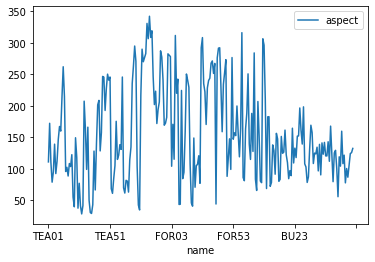

In [34]:
df.plot(x="name",y=['aspect'], kind='line')


In [35]:
df['dndviab'] = df['ndvi_b'] - df['ndvi_a']
df['dndvibc'] = df['ndvi_c'] - df['ndvi_b']
df['dndviac'] = df['ndvi_c'] - df['ndvi_a']
###
df['db2ab'] = df['b2_b'] - df['b2_a']
df['db2bc'] = df['b2_c'] - df['b2_b']
df['db2ca'] = df['b2_c'] - df['b2_a']

df['db3ab'] = df['b3_b'] - df['b3_a']
df['db3bc'] = df['b3_c'] - df['b3_b']
df['db3ca'] = df['b3_c'] - df['b3_a']

df['db4ab'] = df['b4_b'] - df['b4_a']
df['db4bc'] = df['b4_c'] - df['b4_b']
df['db4ca'] = df['b4_c'] - df['b4_a']

df['db5ab'] = np.log(df['b5_b'] - df['b5_a'])
df['db5bc'] = np.log(df['b5_c'] - df['b5_b'])
df['db5ca'] = np.log(df['b5_c'] - df['b5_a'])

df['db6ab'] = df['b6_b'] - df['b6_a']
df['db6bc'] = df['b6_c'] - df['b6_b']
df['db6ca'] = df['b6_c'] - df['b6_a']

df['db7ab'] = df['b7_b'] - df['b7_a']
df['db7bc'] = df['b7_c'] - df['b7_b']
df['db7ca'] = df['b7_c'] - df['b7_a']

df['db8ab'] = df['b8_b'] - df['b8_a']
df['db8bc'] = df['b8_c'] - df['b8_b']
df['db8ca'] = df['b8_c'] - df['b8_a']

df['db8aab'] = df['b8a_b'] - df['b8a_a']
df['db8abc'] = df['b8a_c'] - df['b8a_b']
df['db8aca'] = df['b8a_c'] - df['b8a_a']
### Different Bands Difference
df['db8b4a'] = df['b8_a']  // df['b4_a']



df['db8ab2c']= df['b8a_c'] // df['b2_c']




/home/mas/.venvs/tea/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/mas/.venvs/tea/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [36]:
df['b8_a']  / df['b4_a']

0      3.178702
1      3.569011
2      5.783099
3      5.994894
4      5.773631
         ...   
243    1.434560
244    1.256684
245    1.296286
246    1.324468
247    1.388711
Length: 248, dtype: float64

<AxesSubplot:xlabel='name'>

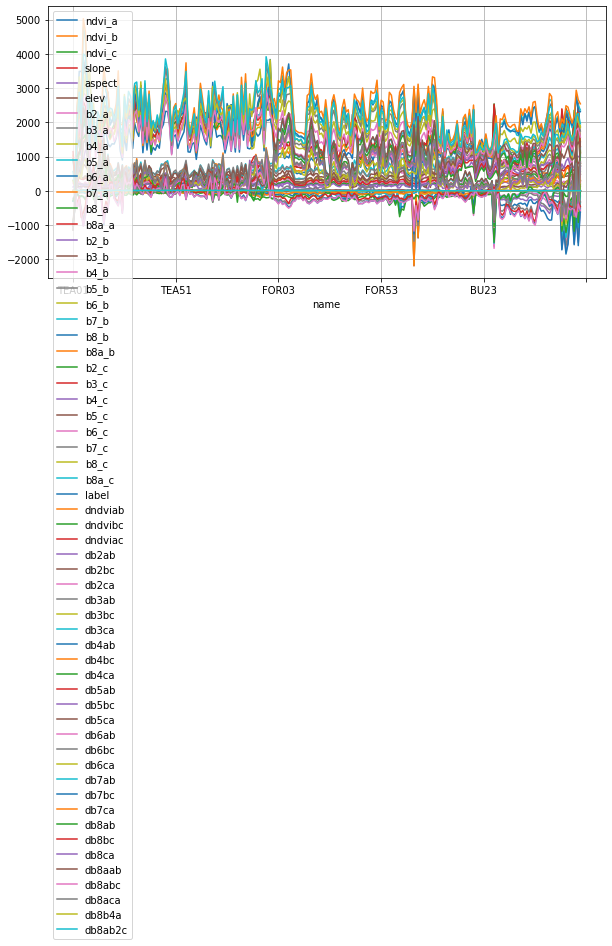

In [37]:
df.set_index("name").plot(figsize=(10,5), grid=True)

## ndvi

In [38]:
t = pd.DataFrame(df['ndvi_b']-df['ndvi_c'],columns=['dndvibc'])

In [39]:
t.reindex_like(df)

,name,ndvi_a,ndvi_b,ndvi_c,slope,aspect,elev,b2_a,b3_a,b4_a,...,db7bc,db7ca,db8ab,db8bc,db8ca,db8aab,db8abc,db8aca,db8b4a,db8ab2c
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='name'>

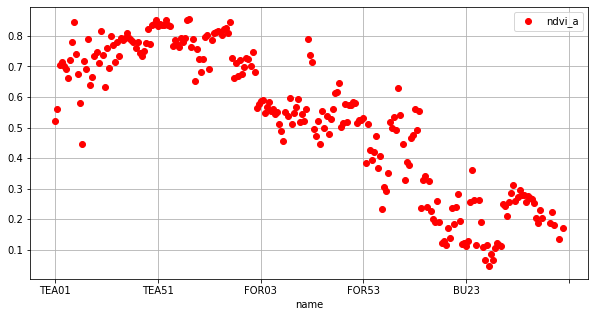

In [40]:
df.set_index("name").plot( y=['ndvi_a'],figsize=(10,5), grid=True,style='ro')

<AxesSubplot:xlabel='name'>

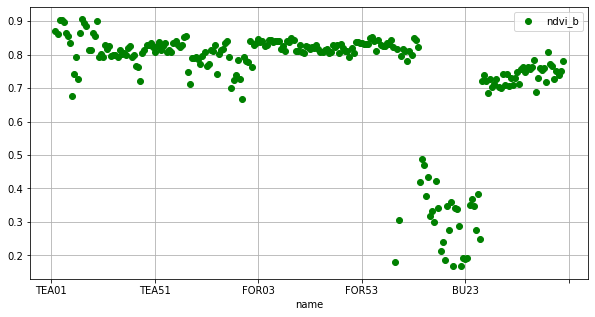

In [41]:
df.set_index("name").plot( y=['ndvi_b'],figsize=(10,5), grid=True,style='go')

<AxesSubplot:xlabel='name'>

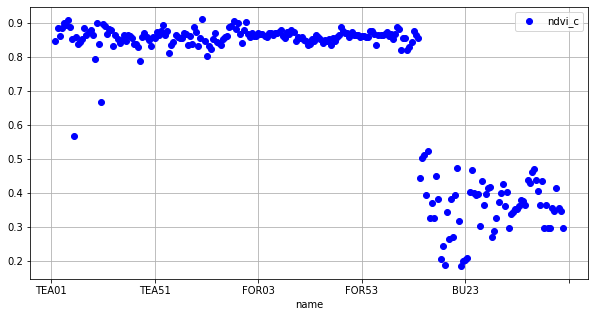

In [42]:
df.set_index("name").plot( y=['ndvi_c'],figsize=(10,5), grid=True,style='bo')

## ndvi der.

<AxesSubplot:xlabel='name'>

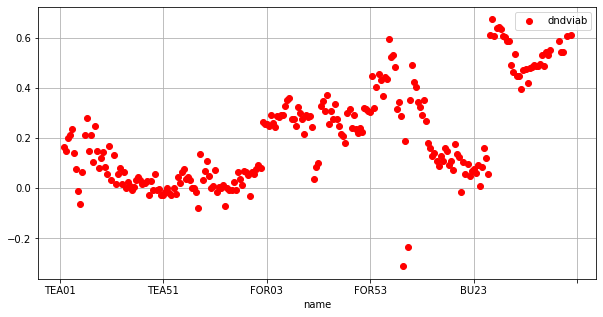

In [43]:
df.set_index("name").plot( y=['dndviab'],figsize=(10,5), grid=True, style='ro')


<AxesSubplot:xlabel='name'>

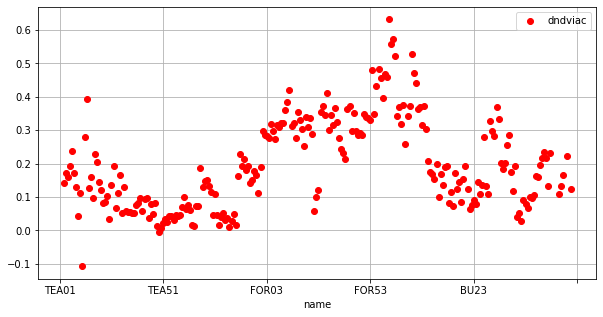

In [44]:
df.set_index("name").plot( y=['dndviac'],figsize=(10,5), grid=True,style='ro')

<AxesSubplot:xlabel='name'>

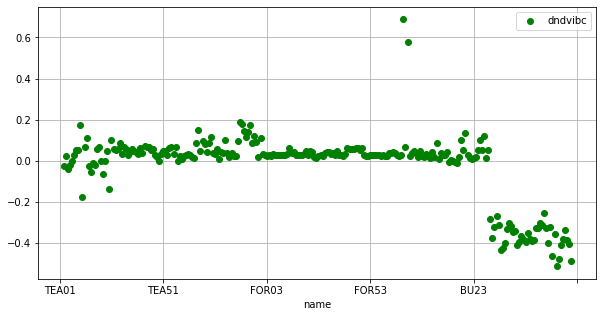

In [45]:
df.set_index("name").plot( y=['dndvibc'],figsize=(10,5), grid=True,style='go')


## slope

<AxesSubplot:xlabel='name'>

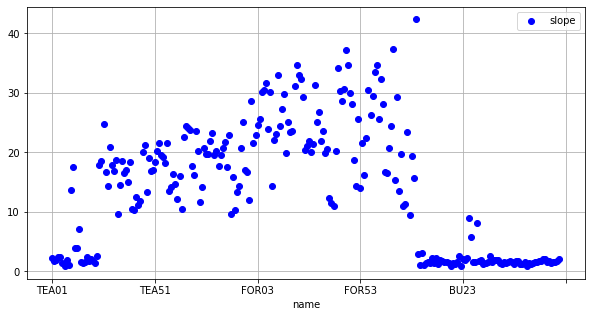

In [46]:
df.set_index("name").plot( y=['slope'],figsize=(10,5), grid=True,style='bo')


## aspect, elev

<AxesSubplot:xlabel='name'>

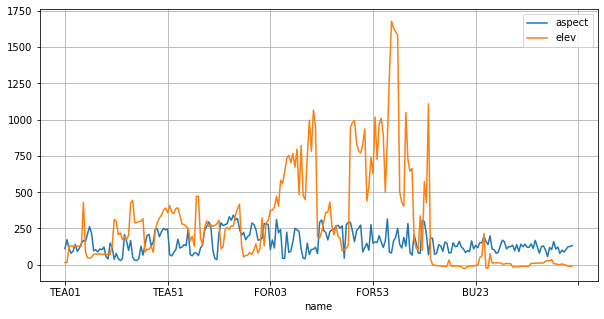

In [47]:
df.set_index("name").plot( y=['aspect','elev'],figsize=(10,5), grid=True)

## Band B2

<AxesSubplot:xlabel='name'>

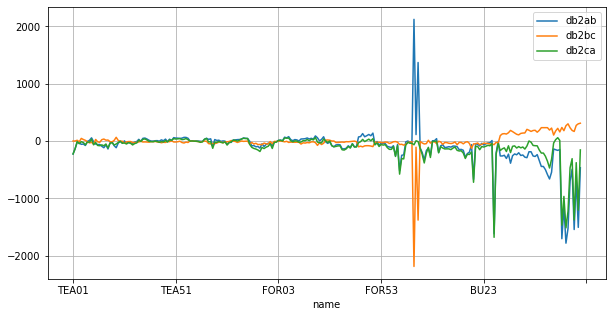

In [48]:
df.set_index("name").plot( y=['db2ab','db2bc','db2ca'],figsize=(10,5), grid=True)


## Band B3

<AxesSubplot:xlabel='name'>

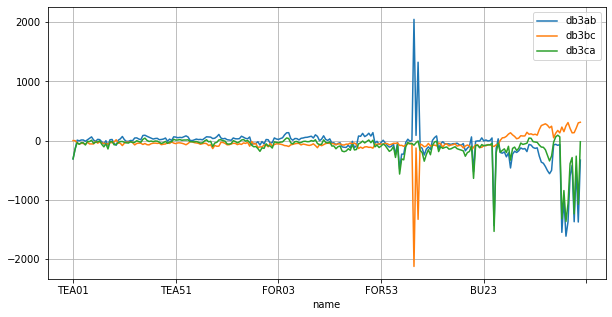

In [49]:
df.set_index("name").plot( y=['db3ab','db3bc','db3ca'],figsize=(10,5), grid=True)


## Band B4

<AxesSubplot:xlabel='name'>

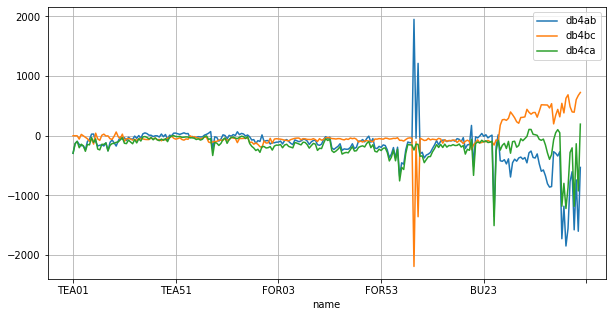

In [50]:
df.set_index("name").plot( y=['db4ab','db4bc','db4ca'],figsize=(10,5), grid=True)

## Band B5

<AxesSubplot:xlabel='name'>

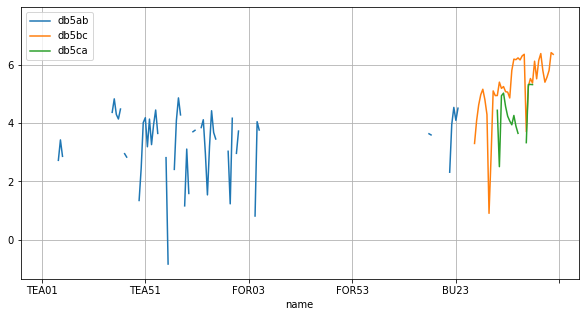

In [51]:
df.set_index("name").plot( y=['db5ab','db5bc','db5ca'],figsize=(10,5), grid=True,)

## Band B6

<AxesSubplot:xlabel='name'>

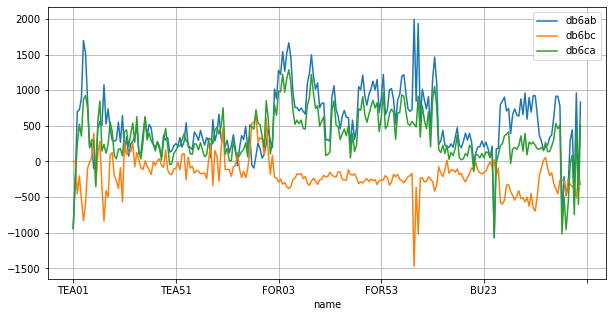

In [52]:
df.set_index("name").plot.line( y=['db6ab','db6bc','db6ca'],figsize=(10,5), grid=True)

## Band B7

<AxesSubplot:xlabel='name'>

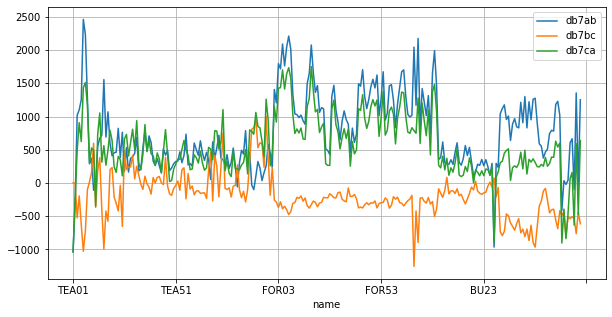

In [53]:
df.set_index("name").plot( y=['db7ab','db7bc','db7ca'],figsize=(10,5), grid=True)

## Band B8

<AxesSubplot:xlabel='name'>

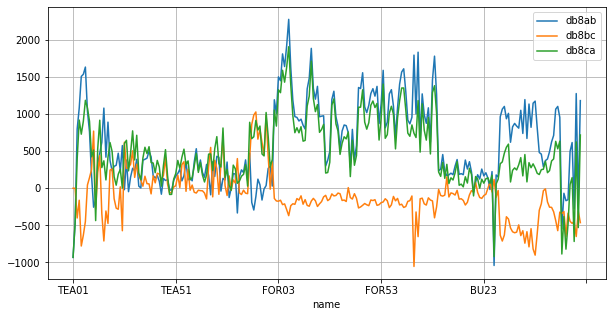

In [54]:
df.set_index("name").plot( y=['db8ab','db8bc','db8ca'],figsize=(10,5), grid=True)

## Band B8a

<AxesSubplot:xlabel='name'>

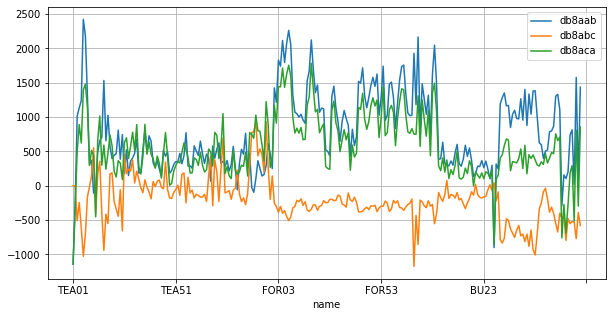

In [55]:
df.set_index("name").plot(y=['db8aab','db8abc','db8aca'],figsize=(10,5), grid=True)

## Bands Difference in same Date

<AxesSubplot:xlabel='name'>

<Figure size 3600x1500 with 0 Axes>

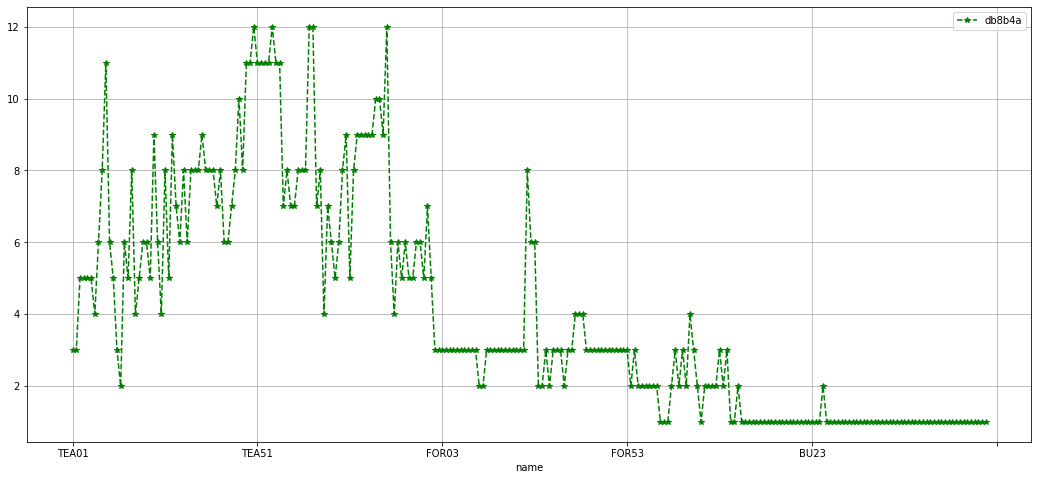

In [56]:
plt.figure(figsize=(12,5),dpi=300)
df.set_index("name").plot( y=['db8b4a'],figsize=(18,8), grid=True,style= ['g*--'])

<AxesSubplot:xlabel='name'>

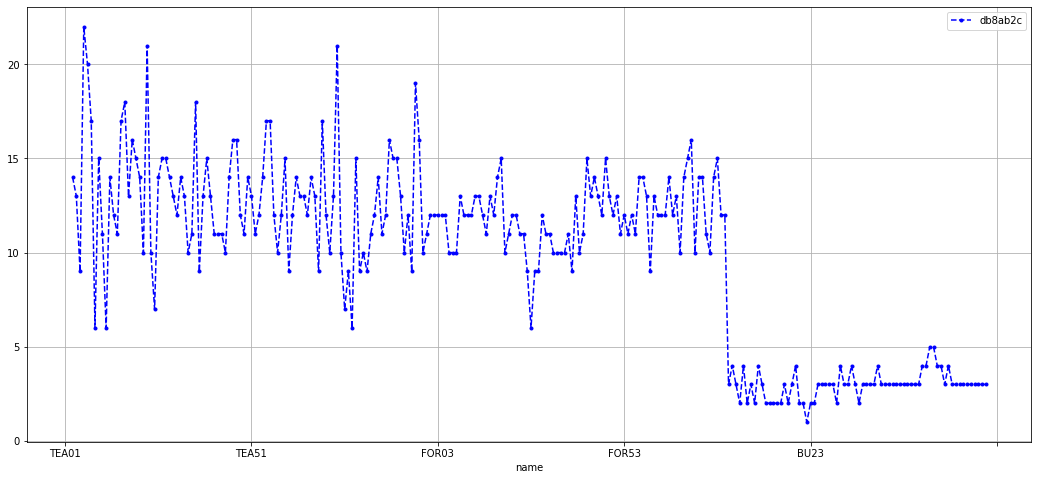

In [57]:
df.set_index("name").plot( y=['db8ab2c'],figsize=(18,8), grid=True,style= ['b.--'] )

In [58]:
for i in df.name[208:]:
    print(i)

PF01
PF02
PF03
PF04
PF05
PF06
PF07
PF08
PF09
PF10
PF11
PF12
PF13
PF14
PF15
PF16
PF17
PF18
PF19
PF20
PF21
PF22
PF23
PF24
PF25
PF26
PF27
PF28
PF29
PF30
PF31
PF32
PF33
PF34
PF35
PF36
PF37
PF38
PF39
PF40


In [59]:
df_tea = df[:98]
df_for = df[98:178]
df_bup = df[178:208]
df_pad = df[208:]

def c(d):
    return d.mean()

### NDVI 

In [60]:
lbl = ['12/21','05/08','08/23']

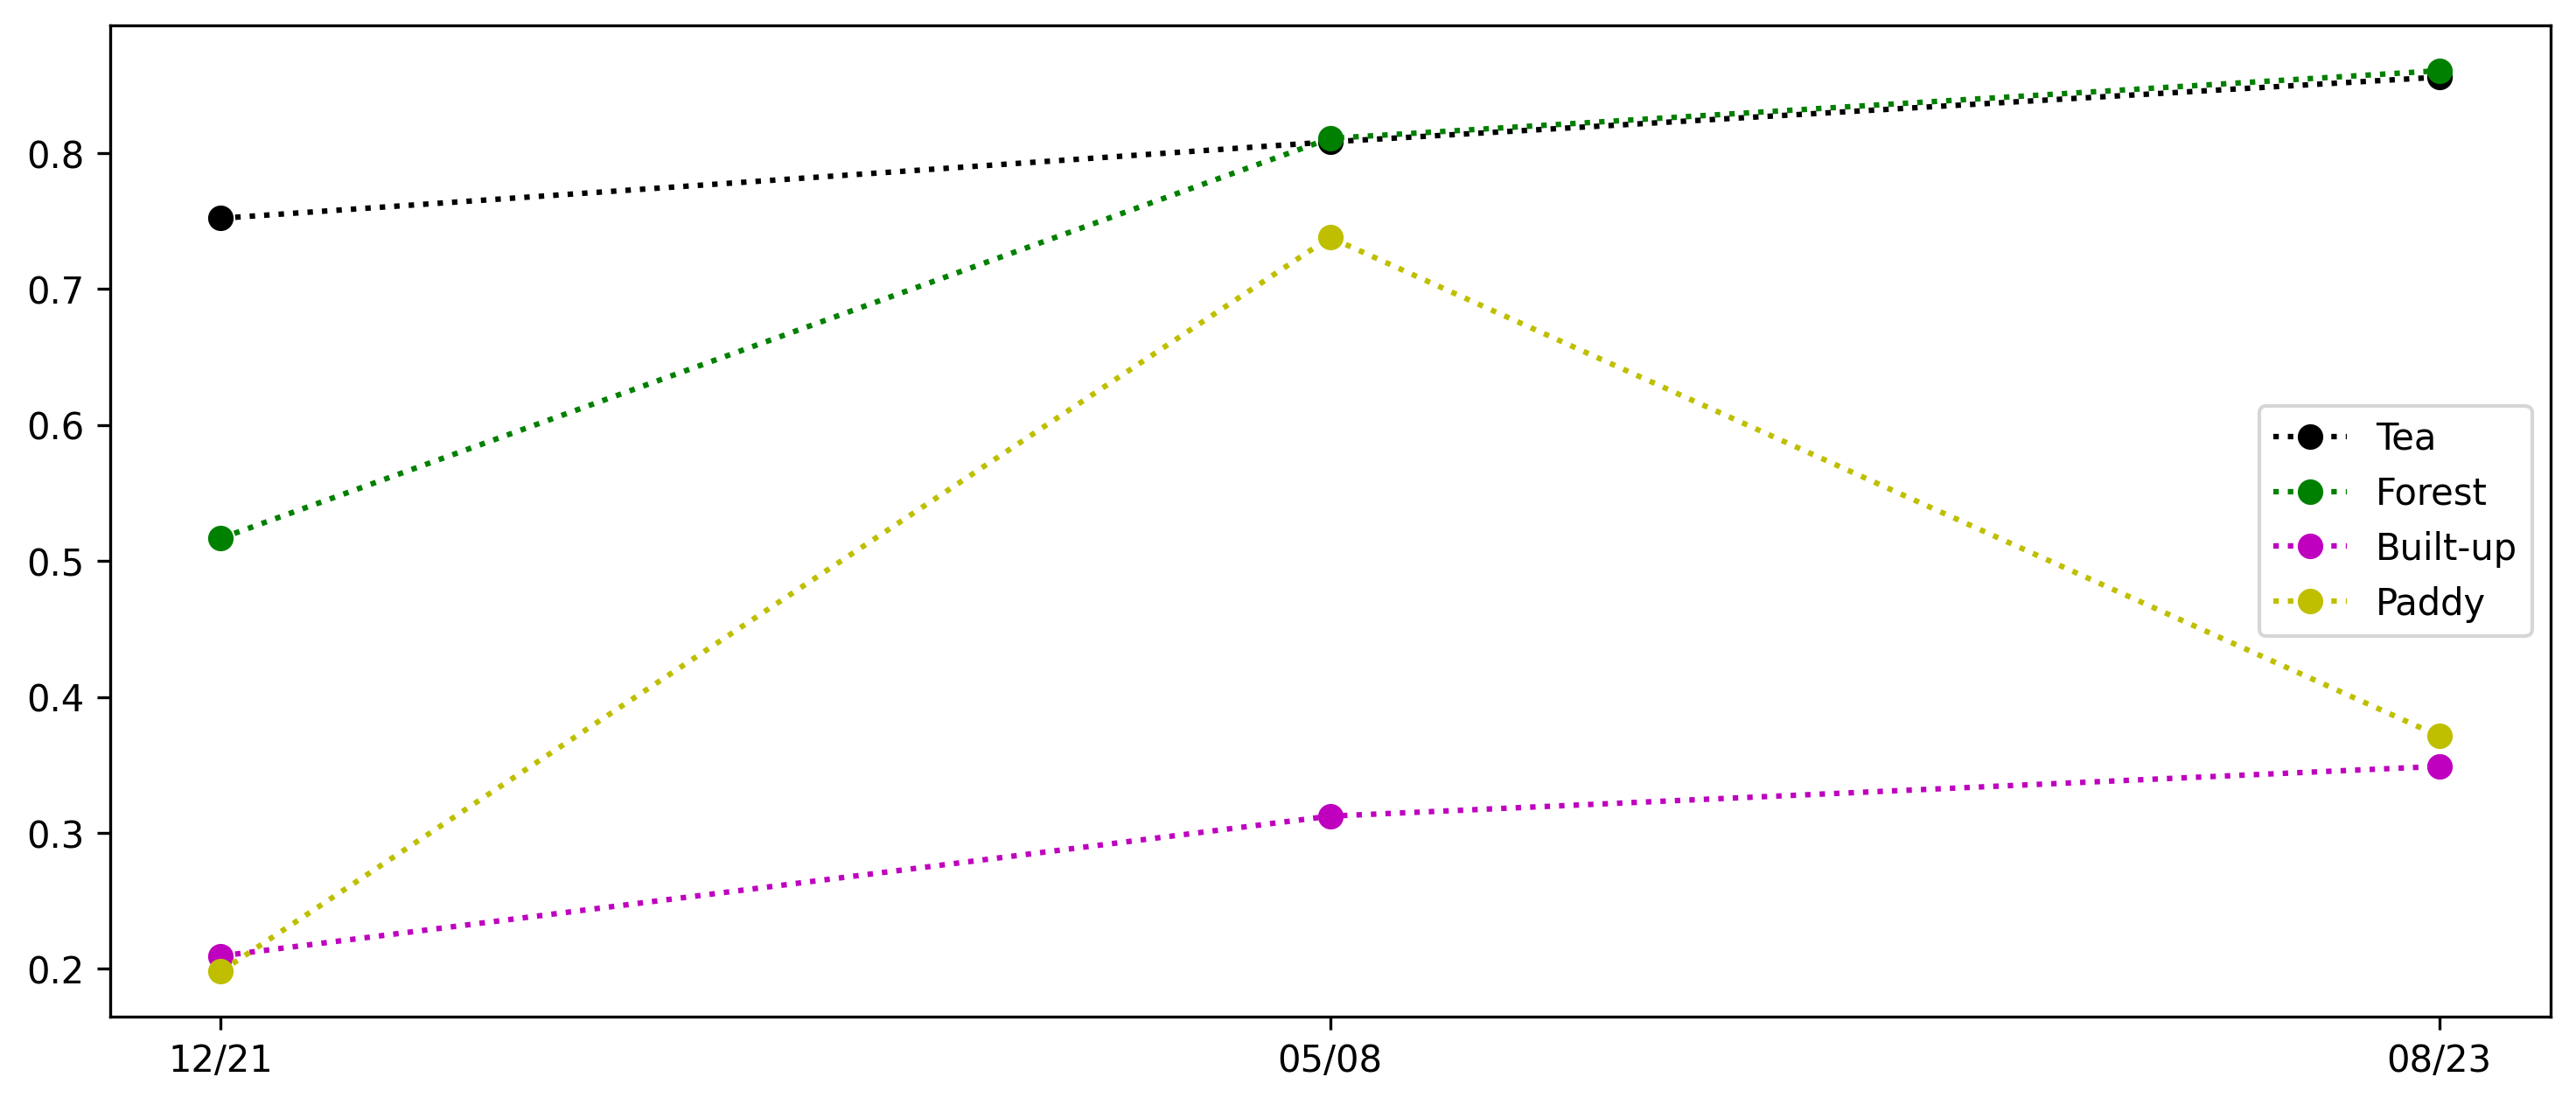

In [61]:
plt.figure(figsize=(12,5),dpi=300)
plt.plot(lbl,[c(df_tea['ndvi_a']),c(df_tea['ndvi_b']),c(df_tea['ndvi_c'])],'ko:',label='Tea')
plt.plot(lbl,[c(df_for['ndvi_a']),c(df_for['ndvi_b']),c(df_for['ndvi_c'])],'go:',label='Forest')
plt.plot(lbl,[c(df_bup['ndvi_a']),c(df_bup['ndvi_b']),c(df_bup['ndvi_c'])],'mo:',label='Built-up')
plt.plot(lbl,[c(df_pad['ndvi_a']),c(df_pad['ndvi_b']),c(df_pad['ndvi_c'])],'yo:',label='Paddy')
plt.legend()

### Slope, Elevation, Aspect

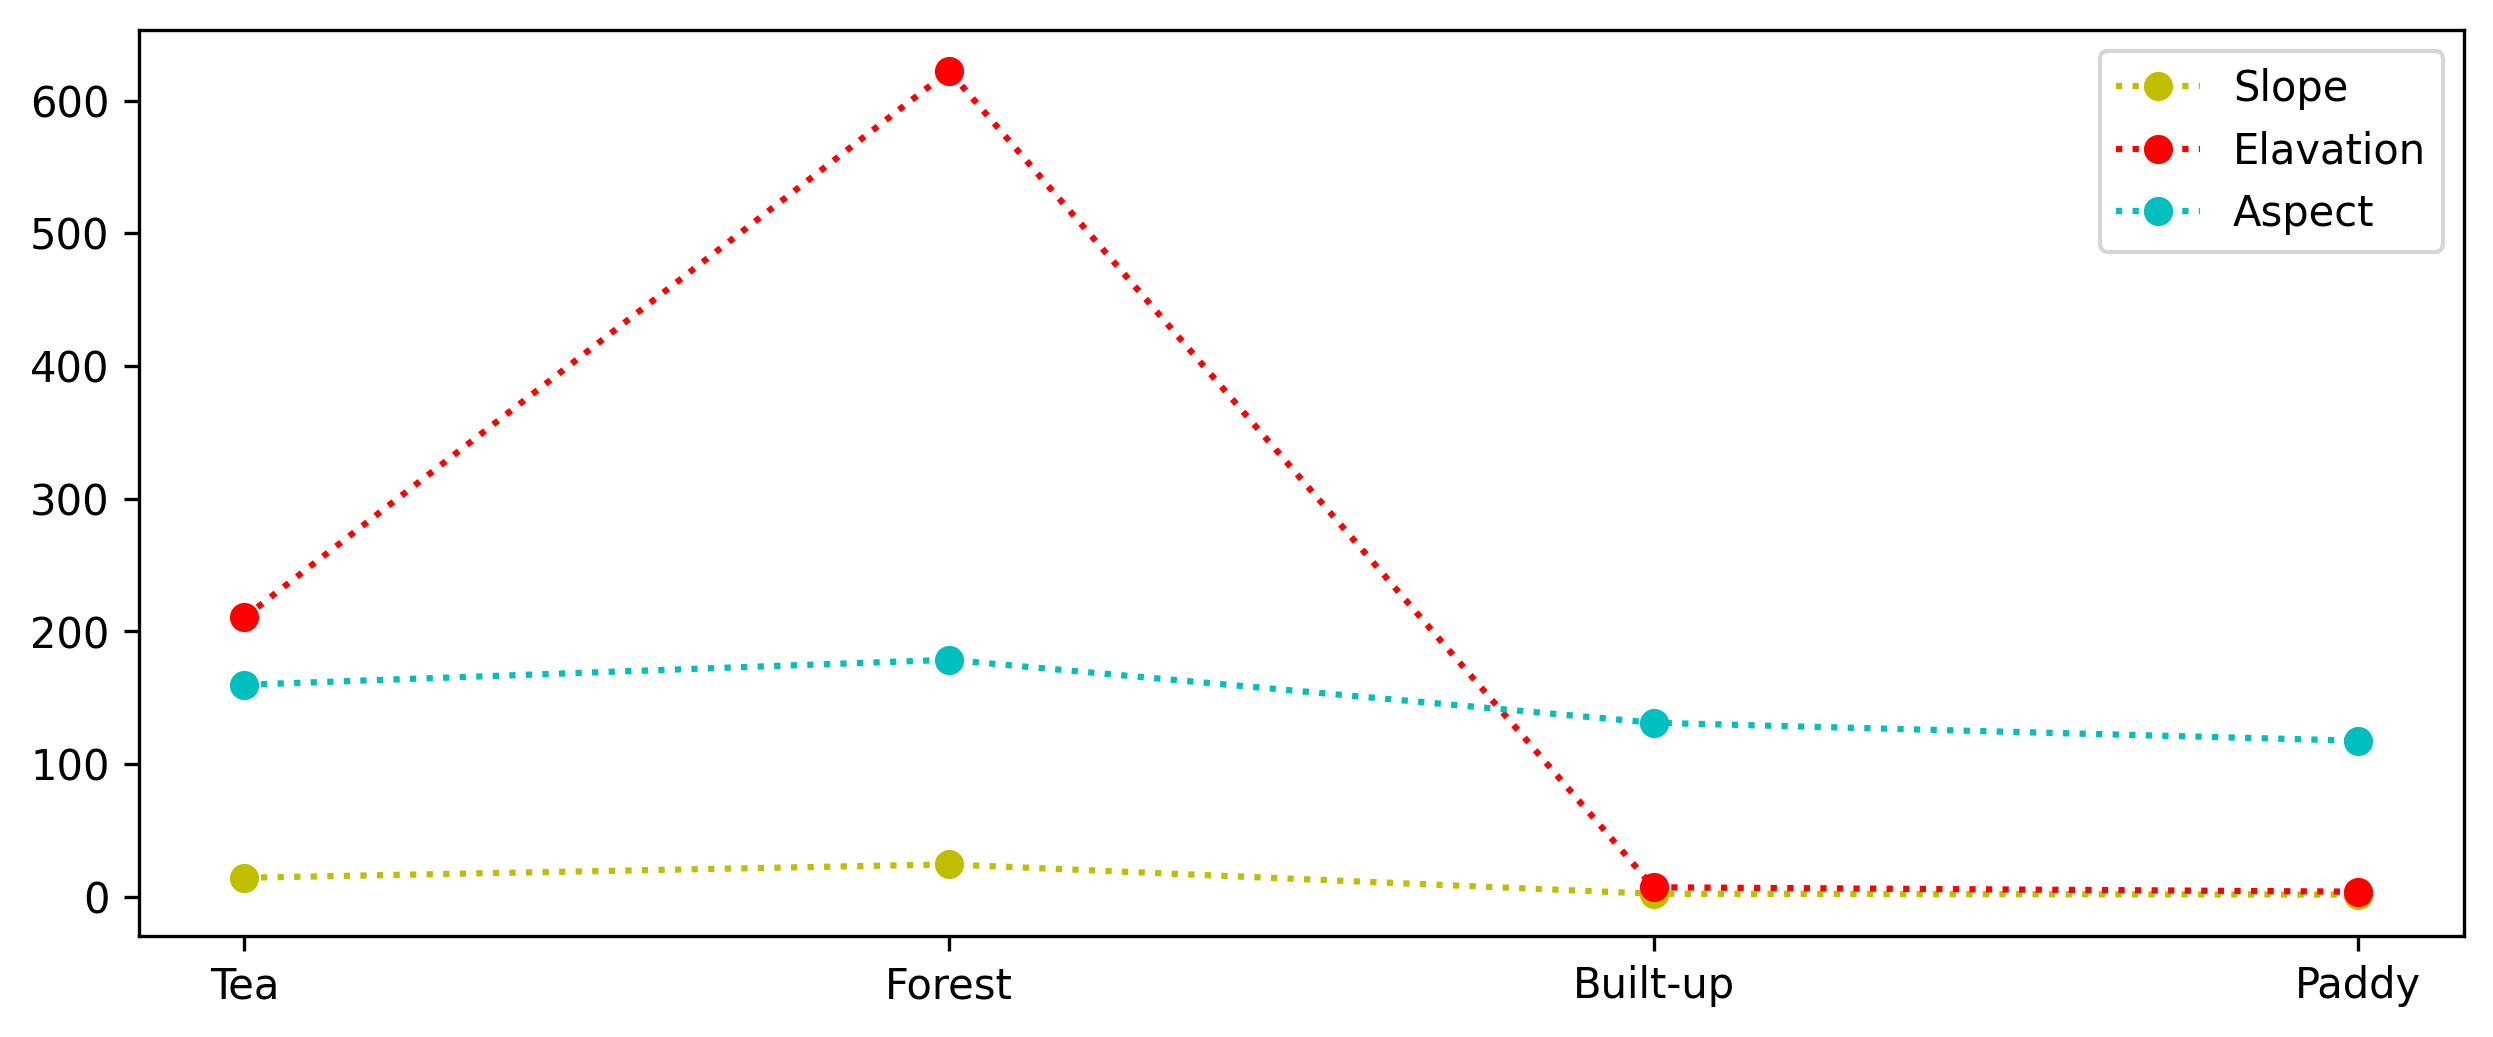

In [62]:
plt.figure(figsize=(10,4),dpi=300)
plt.plot(['Tea','Forest','Built-up','Paddy'],[c(df_tea['slope']),c(df_for['slope']),c(df_bup['slope']),c(df_pad['slope'])],'yo:',label='Slope')
plt.plot(['Tea','Forest','Built-up','Paddy'],[c(df_tea['elev']),c(df_for['elev']),c(df_bup['elev']),c(df_pad['elev'])],'ro:',label='Elavation')
plt.plot(['Tea','Forest','Built-up','Paddy'],[c(df_tea['aspect']),c(df_for['aspect']),c(df_bup['aspect']),c(df_pad['aspect'])],'co:',label='Aspect')
plt.legend()

### Bands

Text(0.5, 1.0, 'Bands Score for Different Crop in 12 Farvardin')

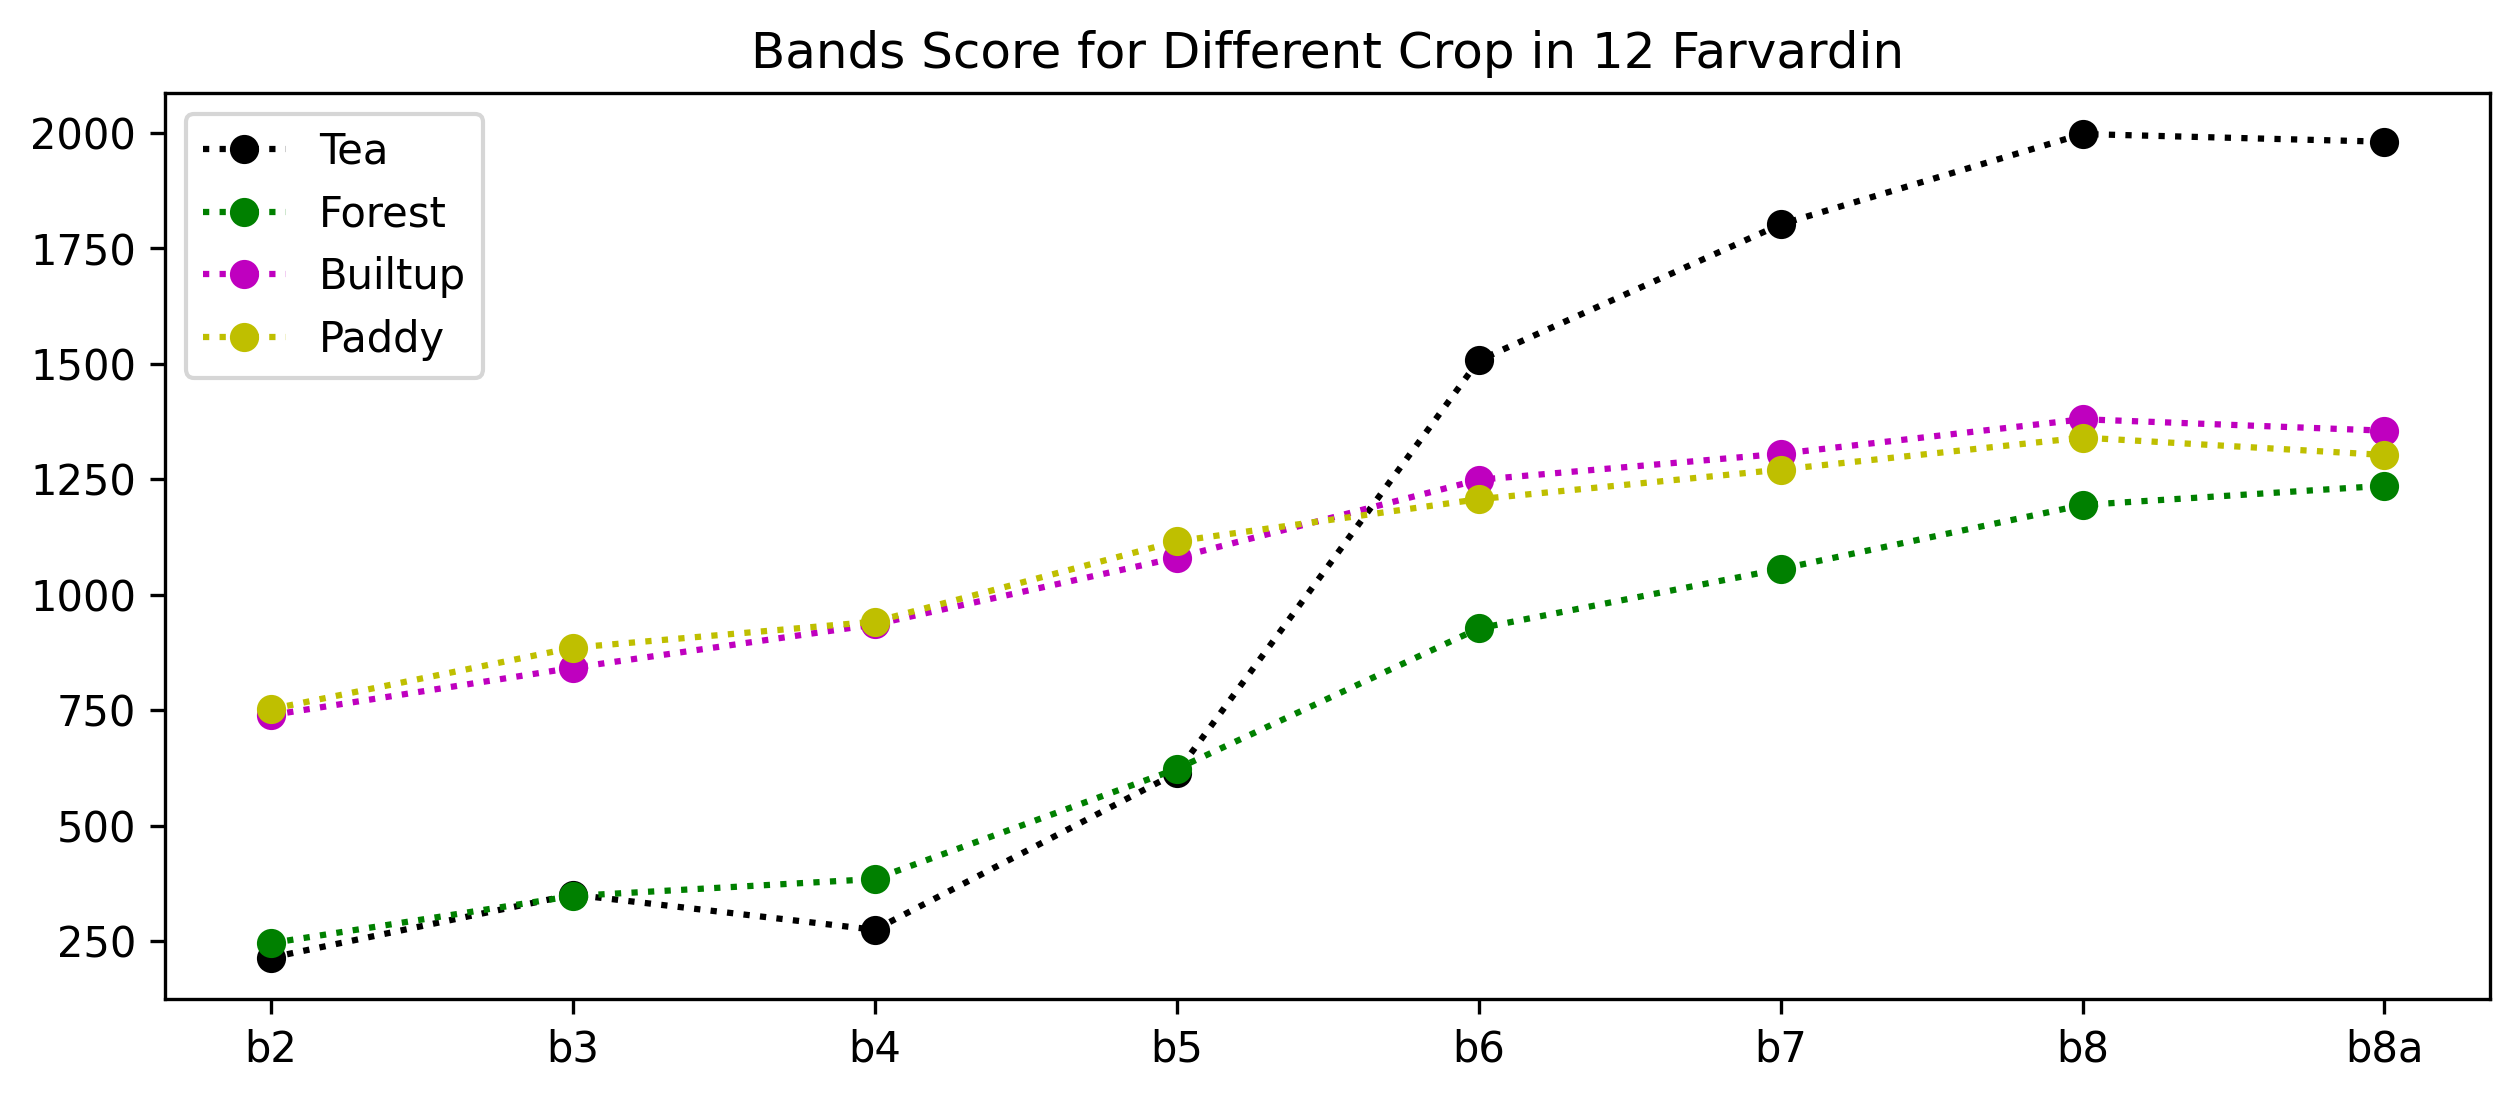

In [63]:
plt.figure(figsize=(10,4),dpi=300)
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_tea['b2_a']),c(df_tea['b3_a']),c(df_tea['b4_a']),c(df_tea['b5_a']),c(df_tea['b6_a']),c(df_tea['b7_a']),c(df_tea['b8_a']),c(df_tea['b8a_a'])],'ko:',label='Tea')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_for['b2_a']),c(df_for['b3_a']),c(df_for['b4_a']),c(df_for['b5_a']),c(df_for['b6_a']),c(df_for['b7_a']),c(df_for['b8_a']),c(df_for['b8a_a'])],'go:',label='Forest')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_bup['b2_a']),c(df_bup['b3_a']),c(df_bup['b4_a']),c(df_bup['b5_a']),c(df_bup['b6_a']),c(df_bup['b7_a']),c(df_bup['b8_a']),c(df_bup['b8a_a'])],'mo:',label='Builtup')
#plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_wat['b2_a']),c(df_wat['b3_a']),c(df_wat['b4_a']),c(df_wat['b5_a']),c(df_wat['b6_a']),c(df_wat['b7_a']),c(df_wat['b8_a']),c(df_wat['b8a_a'])],'co:',label='Water')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_pad['b2_a']),c(df_pad['b3_a']),c(df_pad['b4_a']),c(df_pad['b5_a']),c(df_pad['b6_a']),c(df_pad['b7_a']),c(df_pad['b8_a']),c(df_pad['b8a_a'])],'yo:',label='Paddy')
plt.legend()
plt.title('Bands Score for Different Crop in 12 Farvardin')



Text(0.5, 1.0, 'Bands Score for Different Crop in 26 Ordibehesht')

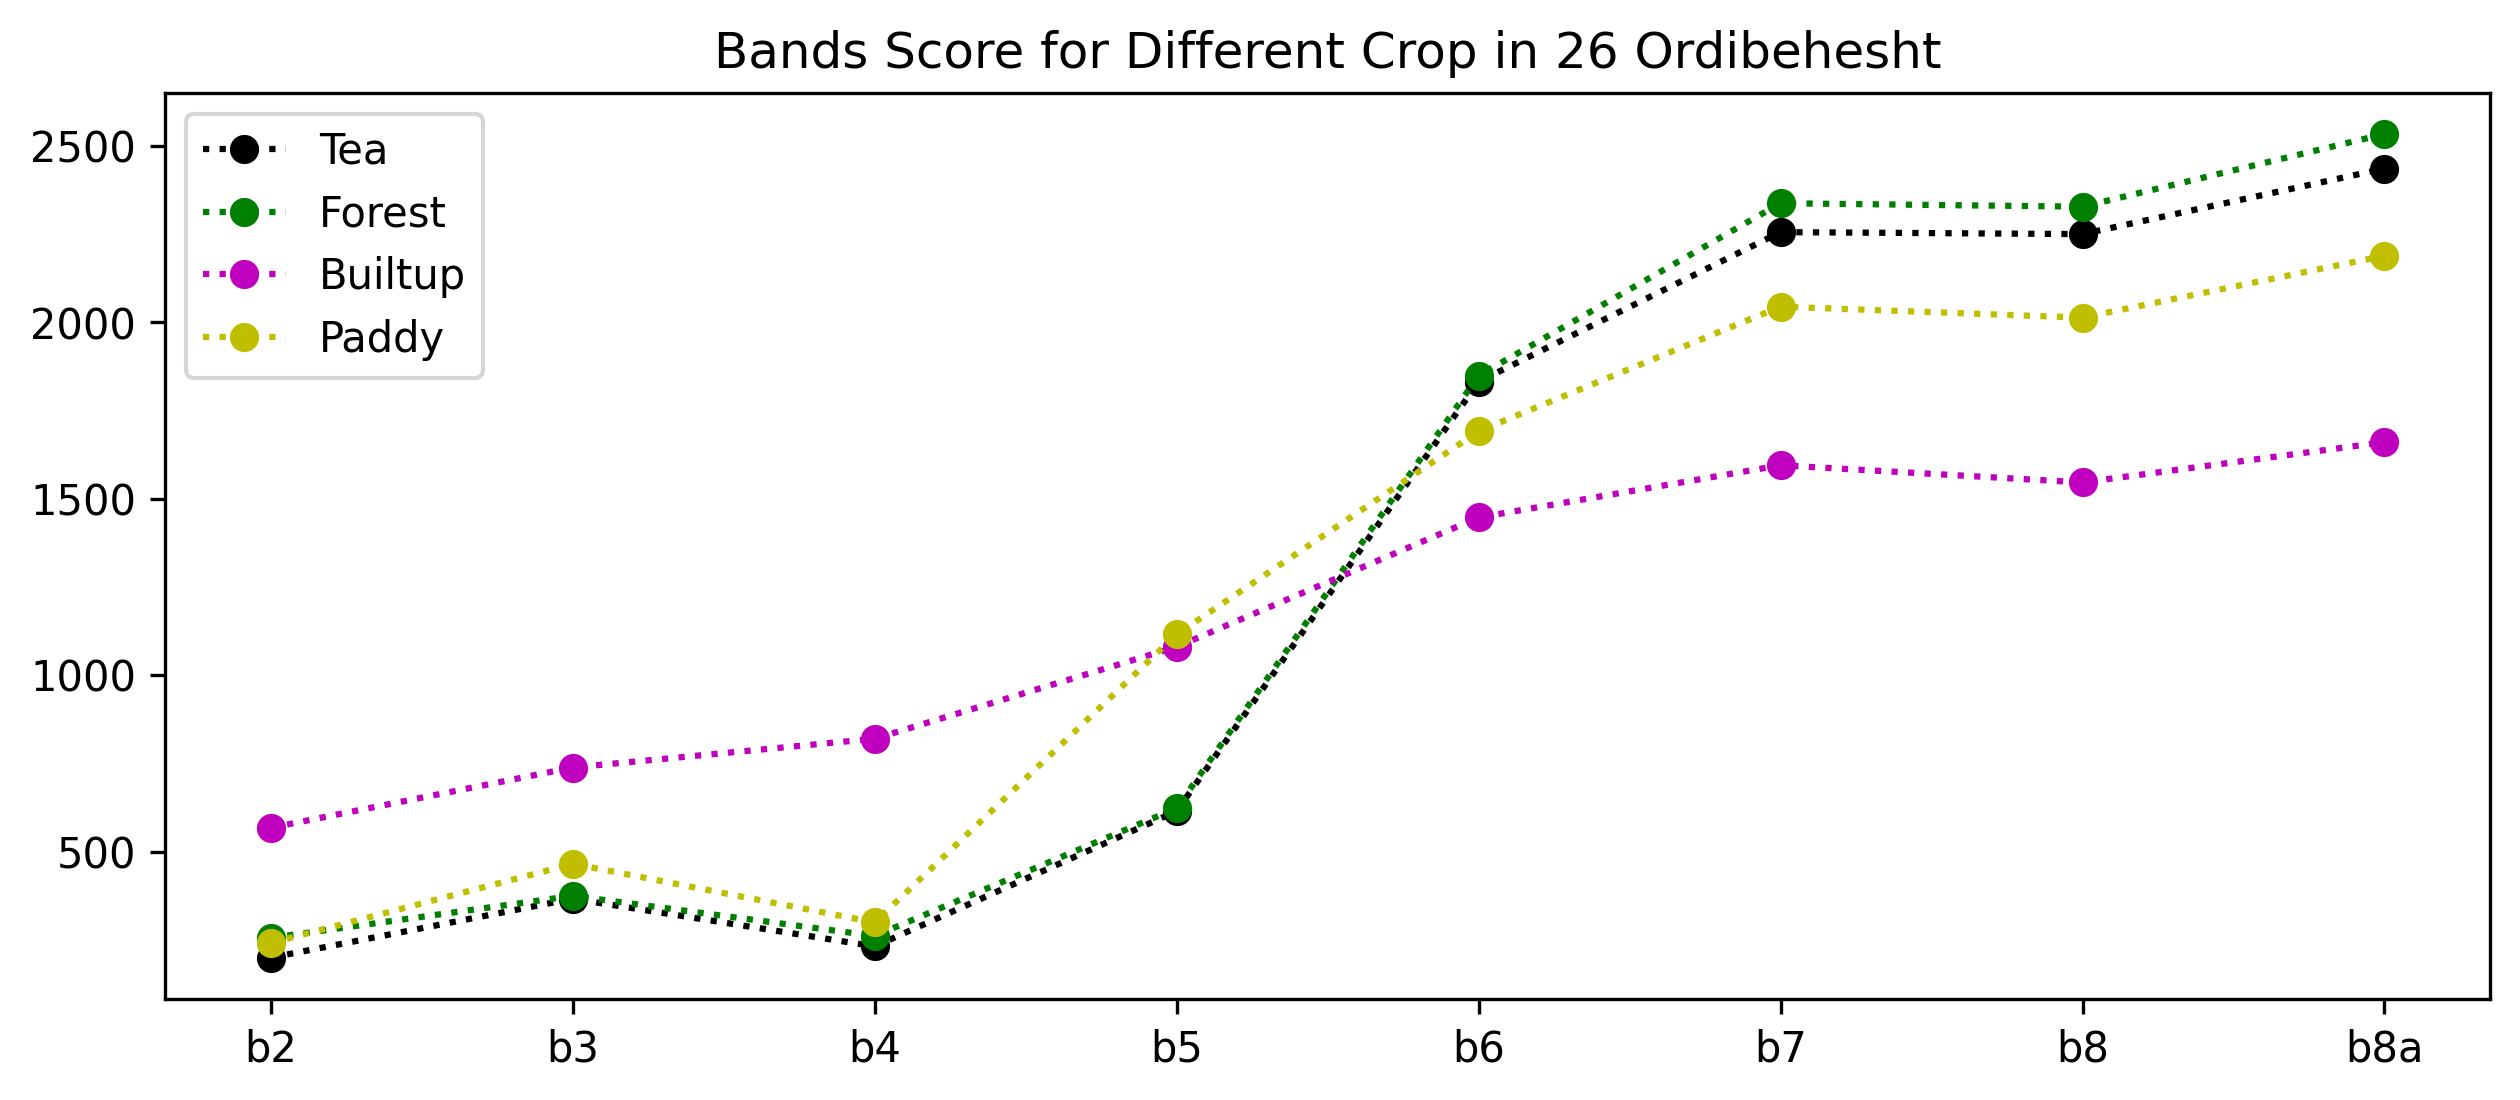

In [64]:
plt.figure(figsize=(10,4),dpi=300)
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_tea['b2_b']),c(df_tea['b3_b']),c(df_tea['b4_b']),c(df_tea['b5_a']),c(df_tea['b6_b']),c(df_tea['b7_b']),c(df_tea['b8_b']),c(df_tea['b8a_b'])],'ko:',label='Tea')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_for['b2_b']),c(df_for['b3_b']),c(df_for['b4_b']),c(df_for['b5_a']),c(df_for['b6_b']),c(df_for['b7_b']),c(df_for['b8_b']),c(df_for['b8a_b'])],'go:',label='Forest')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_bup['b2_b']),c(df_bup['b3_b']),c(df_bup['b4_b']),c(df_bup['b5_a']),c(df_bup['b6_b']),c(df_bup['b7_b']),c(df_bup['b8_b']),c(df_bup['b8a_b'])],'mo:',label='Builtup')
# plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_wat['b2_b']),c(df_wat['b3_b']),c(df_wat['b4_b']),c(df_wat['b5_a']),c(df_wat['b6_b']),c(df_wat['b7_b']),c(df_wat['b8_b']),c(df_wat['b8a_b'])],'co:',label='Water')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_pad['b2_b']),c(df_pad['b3_b']),c(df_pad['b4_b']),c(df_pad['b5_a']),c(df_pad['b6_b']),c(df_pad['b7_b']),c(df_pad['b8_b']),c(df_pad['b8a_b'])],'yo:',label='Paddy')
plt.legend()
plt.title('Bands Score for Different Crop in 26 Ordibehesht')

Text(0.5, 1.0, 'Bands Score for Different Crop in 26 Mehr')

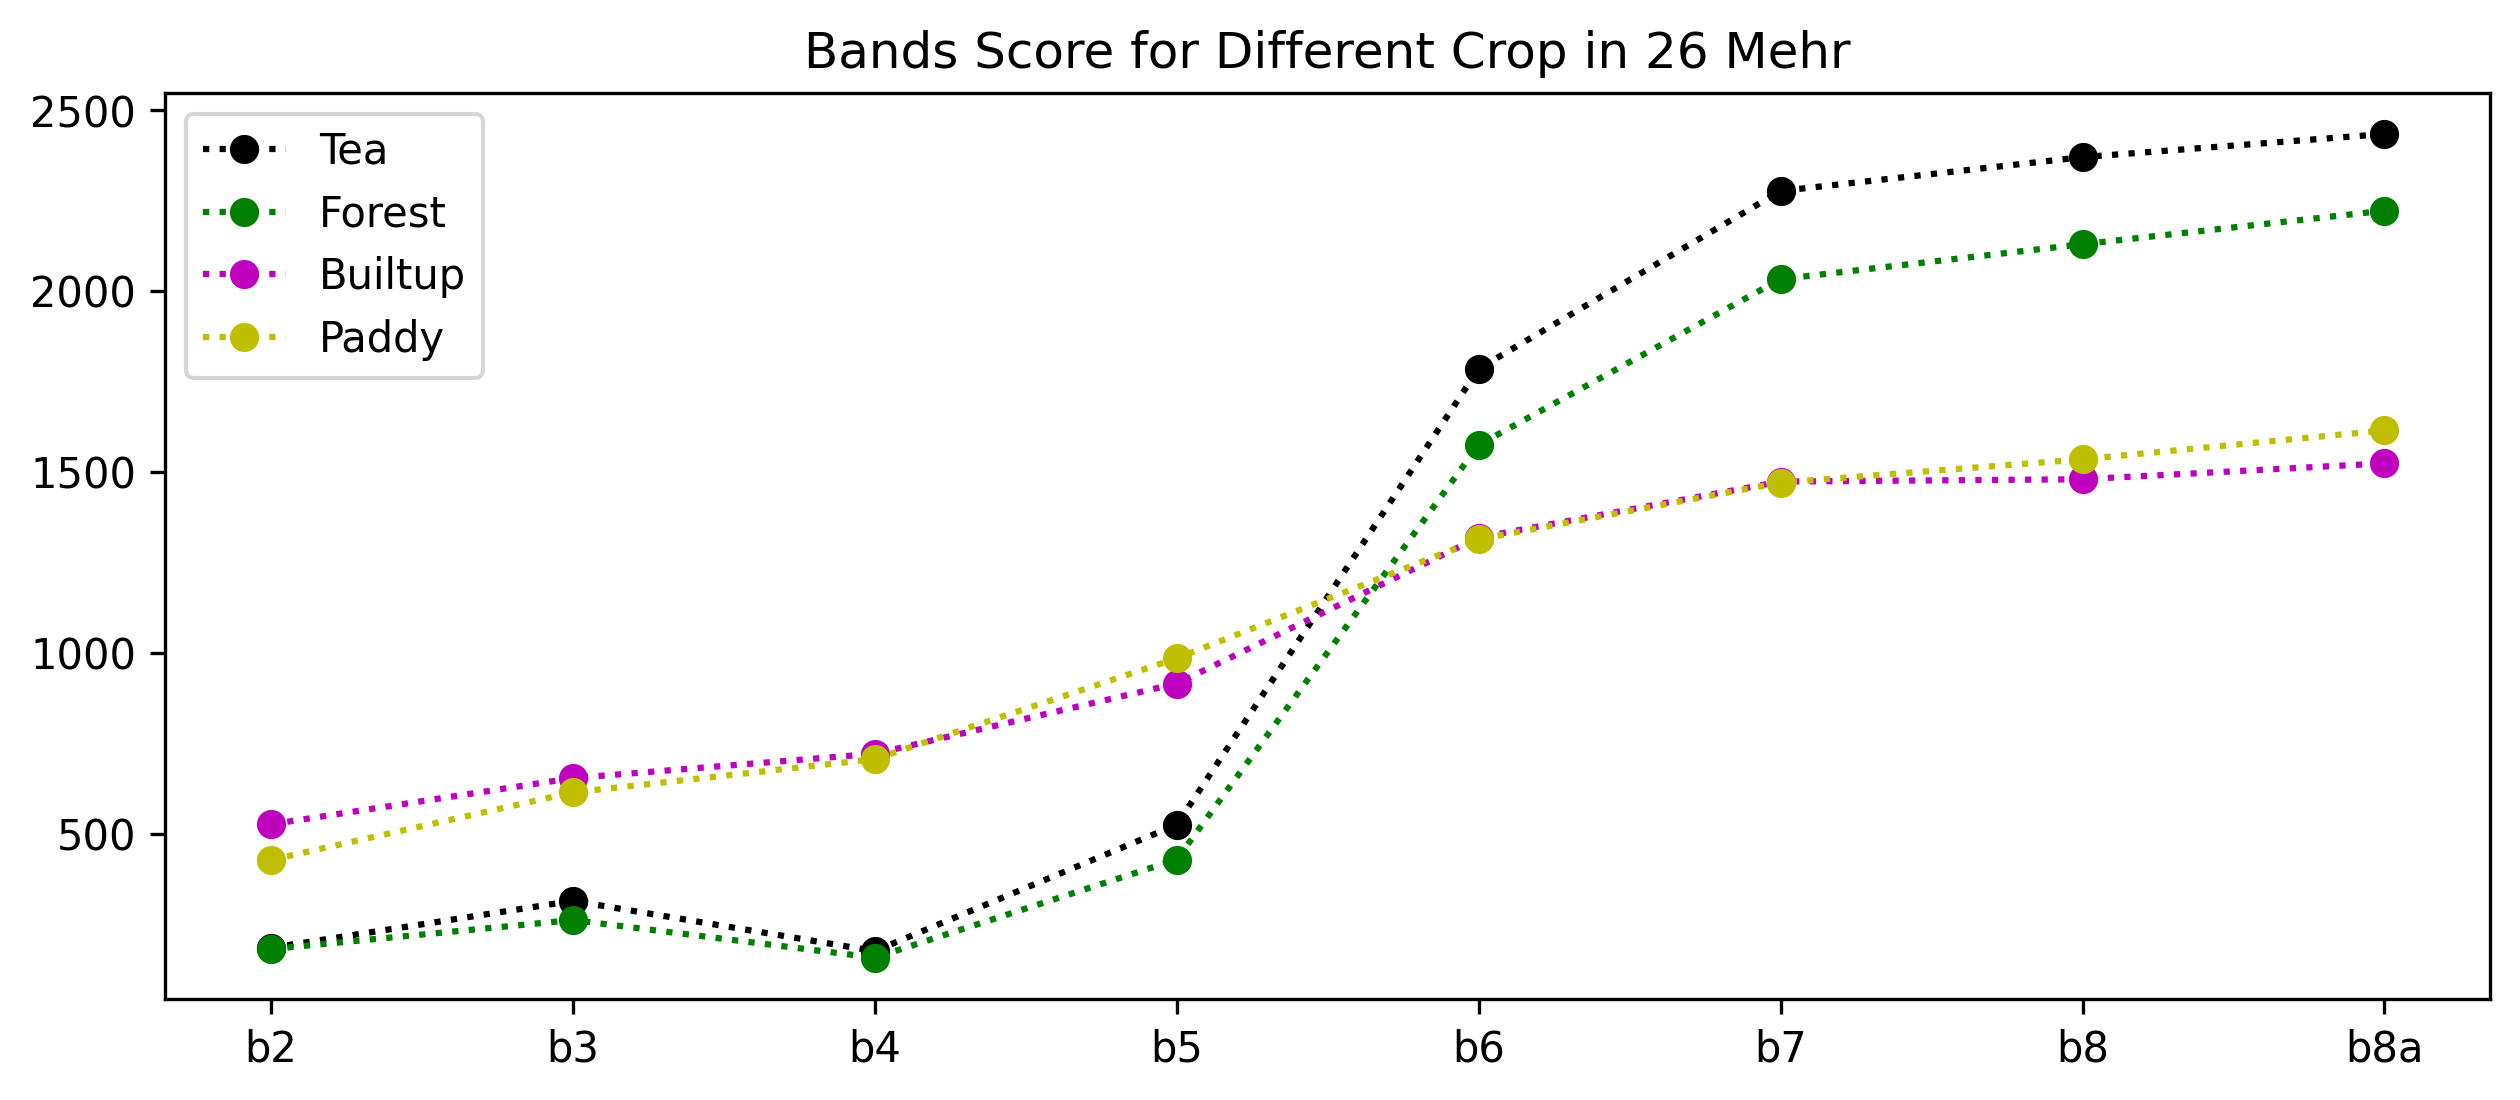

In [65]:
plt.figure(figsize=(10,4),dpi=300)
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_tea['b2_c']),c(df_tea['b3_c']),c(df_tea['b4_c']),c(df_tea['b5_c']),c(df_tea['b6_c']),c(df_tea['b7_c']),c(df_tea['b8_c']),c(df_tea['b8a_c'])],'ko:',label='Tea')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_for['b2_c']),c(df_for['b3_c']),c(df_for['b4_c']),c(df_for['b5_c']),c(df_for['b6_c']),c(df_for['b7_c']),c(df_for['b8_c']),c(df_for['b8a_c'])],'go:',label='Forest')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_bup['b2_c']),c(df_bup['b3_c']),c(df_bup['b4_c']),c(df_bup['b5_c']),c(df_bup['b6_c']),c(df_bup['b7_c']),c(df_bup['b8_c']),c(df_bup['b8a_c'])],'mo:',label='Builtup')
# plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_wat['b2_c']),c(df_wat['b3_c']),c(df_wat['b4_c']),c(df_wat['b5_c']),c(df_wat['b6_c']),c(df_wat['b7_c']),c(df_wat['b8_c']),c(df_wat['b8a_c'])],'co:',label='Water')
plt.plot(['b2','b3','b4','b5','b6','b7','b8','b8a'],[c(df_pad['b2_c']),c(df_pad['b3_c']),c(df_pad['b4_c']),c(df_pad['b5_c']),c(df_pad['b6_c']),c(df_pad['b7_c']),c(df_pad['b8_c']),c(df_pad['b8a_c'])],'yo:',label='Paddy')
plt.legend()
plt.title('Bands Score for Different Crop in 26 Mehr')

#### select most important and informative features

In [66]:
selected_columns = ['name','db8b4a','elev','db8ab2c', 'ndvi_a','ndvi_c','ndvi_b', 'dndvibc','dndviac','dndviab','label']
trimmed_df = pd.DataFrame(data=df, columns=selected_columns).copy()
trimmed_df

,name,db8b4a,elev,db8ab2c,ndvi_a,ndvi_c,ndvi_b,dndvibc,dndviac,dndviab,label
0,TEA01,3.0,15.000000,NaN,0.520124,NaN,NaN,NaN,NaN,NaN,1
1,TEA02,3.0,14.050898,NaN,0.559265,NaN,NaN,NaN,NaN,NaN,1
2,TEA03,5.0,129.391069,14.0,0.705327,0.845844,0.870102,-0.024259,0.140516,0.164775,1
3,TEA04,5.0,129.569602,13.0,0.714625,0.885643,0.863014,0.022630,0.171018,0.148389,1
4,TEA05,5.0,128.676228,9.0,0.703053,0.861768,0.902409,-0.040640,0.158716,0.199356,1
...,...,...,...,...,...,...,...,...,...,...,...
243,PF36,1.0,-0.053775,3.0,0.181677,0.347261,0.726156,-0.378895,0.165584,0.544479,0
244,PF37,1.0,-2.891402,3.0,NaN,0.415649,0.749923,-0.334273,NaN,NaN,0
245,PF38,1.0,-11.388064,3.0,0.133819,0.355922,0.739262,-0.383341,0.222102,0.605443,0
246,PF39,1.0,-11.334804,3.0,NaN,0.345799,0.751358,-0.405559,NaN,NaN,0


# Create ML Model

### Remove nan values by mean of each class.

In [67]:
label = trimmed_df['label'] # define label var for ML model

trimmed_df['class'] = trimmed_df['name'].str.slice(0,2)
trimmed_df.fillna(trimmed_df.groupby('class').transform('mean'),inplace=True)
trimmed_df

,name,db8b4a,elev,db8ab2c,ndvi_a,ndvi_c,ndvi_b,dndvibc,dndviac,dndviab,label,class
0,TEA01,3.0,15.000000,12.833333,0.520124,0.855862,0.808254,0.047608,0.099384,0.051776,1,TE
1,TEA02,3.0,14.050898,12.833333,0.559265,0.855862,0.808254,0.047608,0.099384,0.051776,1,TE
2,TEA03,5.0,129.391069,14.000000,0.705327,0.845844,0.870102,-0.024259,0.140516,0.164775,1,TE
3,TEA04,5.0,129.569602,13.000000,0.714625,0.885643,0.863014,0.022630,0.171018,0.148389,1,TE
4,TEA05,5.0,128.676228,9.000000,0.703053,0.861768,0.902409,-0.040640,0.158716,0.199356,1,TE
...,...,...,...,...,...,...,...,...,...,...,...,...
243,PF36,1.0,-0.053775,3.000000,0.181677,0.347261,0.726156,-0.378895,0.165584,0.544479,0,PF
244,PF37,1.0,-2.891402,3.000000,0.198022,0.415649,0.749923,-0.334273,0.177110,0.537116,0,PF
245,PF38,1.0,-11.388064,3.000000,0.133819,0.355922,0.739262,-0.383341,0.222102,0.605443,0,PF
246,PF39,1.0,-11.334804,3.000000,0.198022,0.345799,0.751358,-0.405559,0.177110,0.537116,0,PF


In [68]:
label = trimmed_df['label']
names = trimmed_df['name']
features = trimmed_df.copy()
features.drop(['name','class','label'], axis=1,inplace=True)
features

,db8b4a,elev,db8ab2c,ndvi_a,ndvi_c,ndvi_b,dndvibc,dndviac,dndviab
0,3.0,15.000000,12.833333,0.520124,0.855862,0.808254,0.047608,0.099384,0.051776
1,3.0,14.050898,12.833333,0.559265,0.855862,0.808254,0.047608,0.099384,0.051776
2,5.0,129.391069,14.000000,0.705327,0.845844,0.870102,-0.024259,0.140516,0.164775
3,5.0,129.569602,13.000000,0.714625,0.885643,0.863014,0.022630,0.171018,0.148389
4,5.0,128.676228,9.000000,0.703053,0.861768,0.902409,-0.040640,0.158716,0.199356
...,...,...,...,...,...,...,...,...,...
243,1.0,-0.053775,3.000000,0.181677,0.347261,0.726156,-0.378895,0.165584,0.544479
244,1.0,-2.891402,3.000000,0.198022,0.415649,0.749923,-0.334273,0.177110,0.537116
245,1.0,-11.388064,3.000000,0.133819,0.355922,0.739262,-0.383341,0.222102,0.605443
246,1.0,-11.334804,3.000000,0.198022,0.345799,0.751358,-0.405559,0.177110,0.537116


In [71]:
label.to_csv('labels.csv')
names.to_csv('names.csv')

In [70]:
features.to_csv('features.csv')

In [3]:
import pandas as pd

In [30]:
label = pd.read_csv('labels.csv')
label = pd.Series(label['label'])
names = pd.read_csv('names.csv')
features = pd.read_csv('features.csv')
features.drop('Unnamed: 0', inplace=True, axis=1)

In [31]:
features

,db8b4a,elev,db8ab2c,ndvi_a,ndvi_c,ndvi_b,dndvibc,dndviac,dndviab
0,3.0,15.000000,12.833333,0.520124,0.855862,0.808254,0.047608,0.099384,0.051776
1,3.0,14.050898,12.833333,0.559265,0.855862,0.808254,0.047608,0.099384,0.051776
2,5.0,129.391069,14.000000,0.705327,0.845844,0.870102,-0.024259,0.140516,0.164775
3,5.0,129.569602,13.000000,0.714625,0.885643,0.863014,0.022630,0.171018,0.148389
4,5.0,128.676228,9.000000,0.703053,0.861768,0.902409,-0.040640,0.158716,0.199356
5,5.0,127.499290,22.000000,0.692046,0.884389,0.904913,-0.020523,0.192343,0.212867
6,4.0,127.948706,20.000000,0.663019,0.899600,0.898449,0.001150,0.236581,0.235430
7,6.0,127.503033,17.000000,0.722563,0.894258,0.864769,0.029489,0.171695,0.142206
8,8.0,128.386812,6.000000,0.778836,0.908021,0.856365,0.051657,0.129185,0.077529
9,11.0,430.601470,15.000000,0.844625,0.887230,0.835345,0.051885,0.042605,-0.009280


#### Split data into train and test split

In [55]:
from sklearn.model_selection import train_test_split
try:
    X_train, X_test, y_train, y_test = train_test_split(features, label, train_size=0.60,random_state=1314)
    print("Successfully shuffled and split the data!")
except:
    print("Something went wrong with shuffling and splitting the data.")

Successfully shuffled and split the data!


In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error, fbeta_score

In [57]:
def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric . """

    error = mean_absolute_error(y_true, y_predict)
    return error

In [58]:
def fit_model(X, y):
    """ Tunes a RandomForestTree Classifier model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = RandomForestClassifier()

    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    scoring_function = make_scorer(fbeta_score, beta=1)

    # Make the GridSearchCV object
    reg = GridSearchCV(estimator=regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

In [59]:
# # Test fit_model on entire dataset
# try:
#     print("Successfully fit a model!")
# except:
#     print("Something went wrong with fitting a model.")
classifier = fit_model(features, label)

/home/mas/.venvs/p2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [60]:
train_err = performance_metric(y_train, classifier.predict(X_train))
train_err

0.0

In [61]:
classifier.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=570817554, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1877494312, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fract

In [62]:
test_err = performance_metric(y_test , classifier.predict(X_test))

In [63]:
test_err

0.0

In [64]:
feature_importance = [i for i in zip(features.columns.values, classifier.feature_importances_)]
sorted(feature_importance,key=lambda x:x[1] ,reverse=True)
for i in  sorted(feature_importance,key=lambda x:x[1] ,reverse=True):
    print("{}:   {}\n".format(i[0],i[1]))

ndvi_a:   0.346481597015

dndviab:   0.19203730638

ndvi_c:   0.158232020451

db8b4a:   0.118789575055

dndviac:   0.0875007802063

ndvi_b:   0.0467431902881

db8ab2c:   0.0309097700233

dndvibc:   0.013740670747

elev:   0.00556508983481



In [65]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [66]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        61
           1       1.00      1.00      1.00        39

   micro avg       1.00      1.00      1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [67]:
print(confusion_matrix(y_test, classifier.predict(X_test)))

[[61  0]
 [ 0 39]]


In [68]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.40, random_state=5)
cv_score = cross_val_score(classifier, features, label, cv=cv)

In [69]:
cv_score

array([0.97, 0.98, 0.99, 0.97, 0.95, 0.92, 0.96, 0.97, 0.96, 0.92])

In [70]:
cv_score.mean()

0.959

In [71]:
cv_score.std()

0.022113344387495962

In [73]:
from sklearn.externals import joblib

In [74]:
joblib.dump(classifier,'tea_classifier_python2.7_scikit-learn0.20.4.joblib')

['tea_classifier_python2.7_scikit-learn0.20.4.joblib']

In [132]:
a =  joblib.load('tea_classifier.joblib')

In [ ]:
a.predict()

## Deoployment Settings

### Features

In [153]:
'db8b4a','elev','db8ab2c', 'ndvi_a','ndvi_c','ndvi_b', 'dndvibc','dndviac','dndviab'

('db8b4a',
 'elev',
 'db8ab2c',
 'ndvi_a',
 'ndvi_c',
 'ndvi_b',
 'dndvibc',
 'dndviac',
 'dndviab')

In [154]:
from typing import NewType
import numpy as np
Polygon = NewType('Polygon',int)
Feature = np.array([])

In [155]:
def create_features(field : Polygon) -> Feature:
    # calculate db8b4a = b8_a // b4_a
    # calculate db8ab2c = b8a_c // b2_c
    # calculate ndvi_a, ndvi_c, ndvi_b
    # calculate dndvibc = ndvi_c - ndvi_b
    # calculate dndviac = ndvi_c - ndvi_a
    # calculate dndvibc = ndvi_b - ndvi_a
    # calculate elev
    features = Feature
    features.reshape(-1,1)
    return features